<a href="https://colab.research.google.com/github/akhil0203/Time_series_analysis/blob/main/Time_Series_Analysis_USDvsINR_LSTM_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Processing**

## **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
import sklearn as sk
import sklearn.metrics as metrics
import tensorflow as tf
import keras.backend as K

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import Dropout
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,mean_absolute_error,r2_score


## **Import Dataset**

In [ ]:
url = 'https://raw.githubusercontent.com/akhil0203/Time_series_analysis/main/USD_INR%20Historical%20Data(2).csv'
data = pd.read_csv(url)
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,10-07-2024,83.504,83.491,83.537,83.477,NaN,0.05%
1,09-07-2024,83.465,83.479,83.522,83.452,NaN,-0.04%
2,08-07-2024,83.500,83.495,83.522,83.434,NaN,0.00%
3,05-07-2024,83.500,83.503,83.532,83.458,NaN,0.03%
4,04-07-2024,83.475,83.495,83.561,83.463,NaN,-0.05%


In [ ]:
data = data[['Date', 'Price']] #drop the columns
data = data.iloc[::-1]  # Reverse the DataFrame
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data.set_index('Date', inplace=True)
data.head()

,Price
Date,
2020-01-01,71.227
2020-01-02,71.350
2020-01-03,71.770
2020-01-06,71.867
2020-01-07,71.845


## **Data Visualisation**

<Axes: xlabel='Date'>

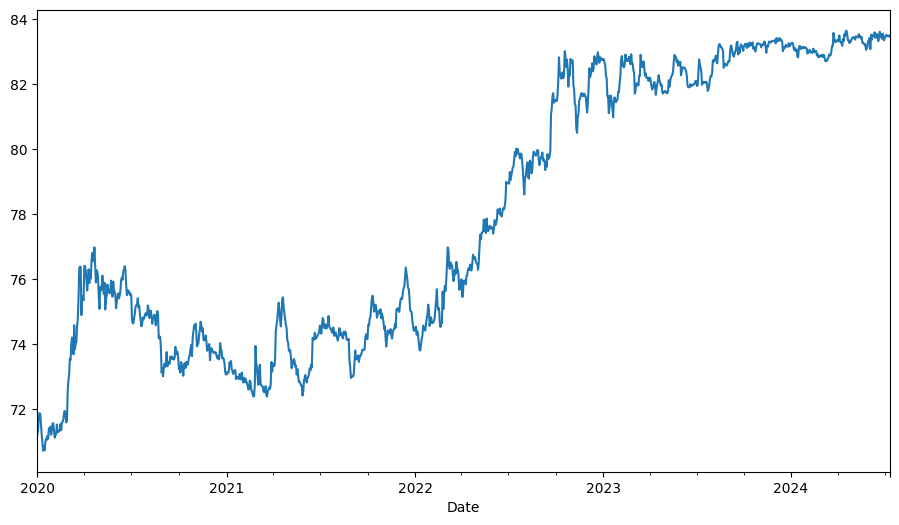

In [ ]:
d=data['Price']
d.plot(kind='line',y='Price',figsize=(11,6))


## **Train(0.8)-Test(0.2) split**

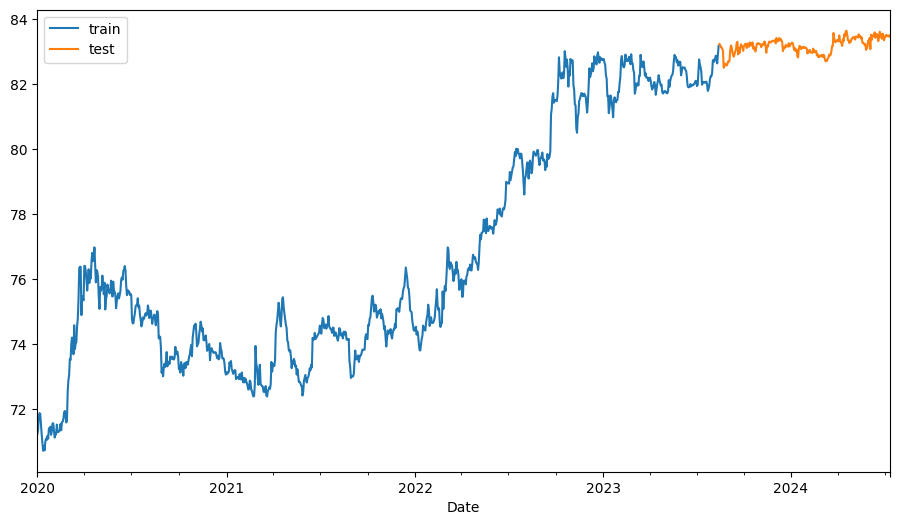

In [ ]:
train_size = int(len(data) * 0.8)
train = d[:train_size]
test = d[train_size:]

ax = train.plot(kind='line',figsize=(11,6))
test.plot(ax=ax,kind='line',figsize=(11,6))
plt.legend(['train', 'test'])

## **Data Normalization**

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
sc_train = scaler.fit_transform(train.values.reshape(-1, 1))
sc_test = scaler.fit_transform(test.values.reshape(-1, 1))
print(sc_train.shape[0])

944


In [ ]:
X_train = sc_train[:-1]
y_train = sc_train[1:]

X_test = sc_test[:-1]
y_test = sc_test[1:]


## **Data Preprocessing for model**

In [ ]:
X_train_l = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_l = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# **Long Short-Term Memory (LSTM)**

In [ ]:
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(50, input_shape=(1, X_train_l.shape[1]), activation='relu', kernel_initializer='lecun_uniform', return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


, shuffle=False, callbacks=[early_stop]

In [ ]:
model_lstm.compile(loss=tf.keras.metrics.mean_squared_error,
              metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')], optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history_model_lstm = model_lstm.fit(X_train_l, y_train, epochs=30, batch_size=1, verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/30
943/943 [==============================] - 5s 3ms/step - loss: 5.9246e-04 - rmse: 0.0243
Epoch 2/30
943/943 [==============================] - 3s 3ms/step - loss: 6.2263e-04 - rmse: 0.0250
Epoch 3/30
943/943 [==============================] - 3s 3ms/step - loss: 5.0295e-04 - rmse: 0.0224
Epoch 4/30
943/943 [==============================] - 3s 4ms/step - loss: 4.8458e-04 - rmse: 0.0220
Epoch 5/30
943/943 [==============================] - 4s 4ms/step - loss: 4.8077e-04 - rmse: 0.0219
Epoch 6/30
943/943 [==============================] - 3s 3ms/step - loss: 4.7913e-04 - rmse: 0.0219
Epoch 7/30
943/943 [==============================] - 3s 3ms/step - loss: 4.7805e-04 - rmse: 0.0219
Epoch 8/30
943/943 [==============================] - 3s 3ms/step - loss: 4.7777e-04 - rmse: 0.0219
Epoch 9/30
943/943 [==============================] - 4s 4ms/step - loss: 4.7746e-04 - rmse: 0.0219
Epoch 10/30
943/943 [==============================] - 3s 3ms/step - loss: 4.7748e-04 - rmse: 0.0219

**Plot for RMSE and Loss**

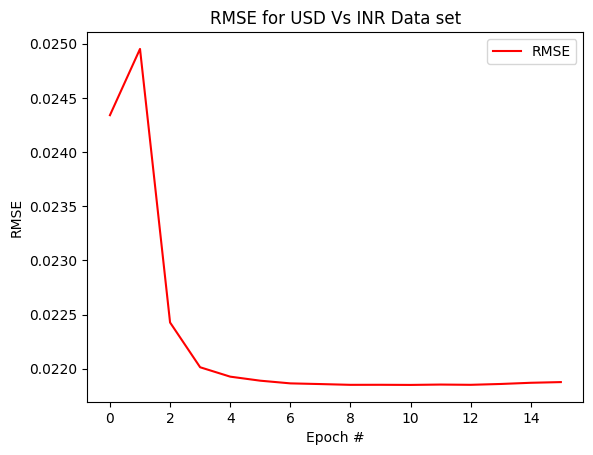

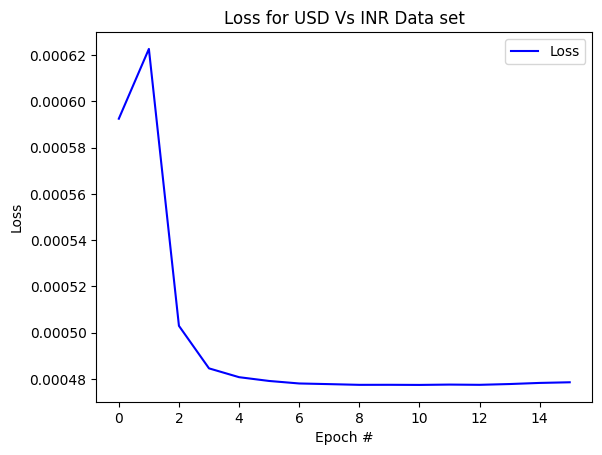

In [ ]:


N = len(history_model_lstm.history['loss'])

# Plot RMSE
plt.figure()
plt.plot(np.arange(0, N), history_model_lstm.history["rmse"], label="RMSE",color='red')
plt.title("RMSE for USD Vs INR Data set")
plt.xlabel("Epoch #")
plt.ylabel("RMSE")
plt.legend(loc="upper right")

# Plot Loss
plt.figure()
plt.plot(np.arange(0, N), history_model_lstm.history["loss"], label="Loss",color='blue')
plt.title("Loss for USD Vs INR Data set")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper right")

plt.show() # Display both plots

In [ ]:
y_train_pred_lstm = model_lstm.predict(X_train_l)
y_test_pred_lstm = model_lstm.predict(X_test_l)



8/8 [==============================] - 0s 2ms/step


**Performance metrics**

Train data


In [ ]:
mse_train_lstm = mean_squared_error(y_train, y_train_pred_lstm)
rmse_train_lstm = np.sqrt(mse_train_lstm)
mae_train_lstm = mean_absolute_error(y_train, y_train_pred_lstm)
r2_train_lstm = r2_score(y_train, y_train_pred_lstm)

print("Mean Squared Error (Train)_LSTM:", mse_train_lstm)
print("Root Mean Squared Error (Train)_LSTM:", rmse_train_lstm)
print("Mean Absolute Error (Train)_LSTM:", mae_train_lstm)
print("R2 Score (Train)_LSTM:", r2_train_lstm)

Mean Squared Error (Train)_LSTM: 0.005958489429639621
Root Mean Squared Error (Train)_LSTM: 0.0771912522870281
Mean Absolute Error (Train)_LSTM: 0.07055568855811195
R2 Score (Train)_LSTM: 0.9290959179120336


Test data

In [ ]:
mse_test_lstm = mean_squared_error(y_test, y_test_pred_lstm)
rmse_test_lstm = np.sqrt(mse_test_lstm)
mae_test_lstm = mean_absolute_error(y_test, y_test_pred_lstm)
r2_test_lstm = r2_score(y_test, y_test_pred_lstm)

print("Mean Squared Error (Test)_LSTM:", mse_test_lstm)
print("Root Mean Squared Error (Test)_LSTM:", rmse_test_lstm)
print("Mean Absolute  Error (Test)_LSTM:", mae_test_lstm)
print("R2 Score (Test)_LSTM:", r2_test_lstm)

Mean Squared Error (Test)_LSTM: 0.014239180354399665
Root Mean Squared Error (Test)_LSTM: 0.11932803674912139
Mean Absolute  Error (Test)_LSTM: 0.09440729486761162
R2 Score (Test)_LSTM: 0.6499683202375287


# **LSTM Plot**

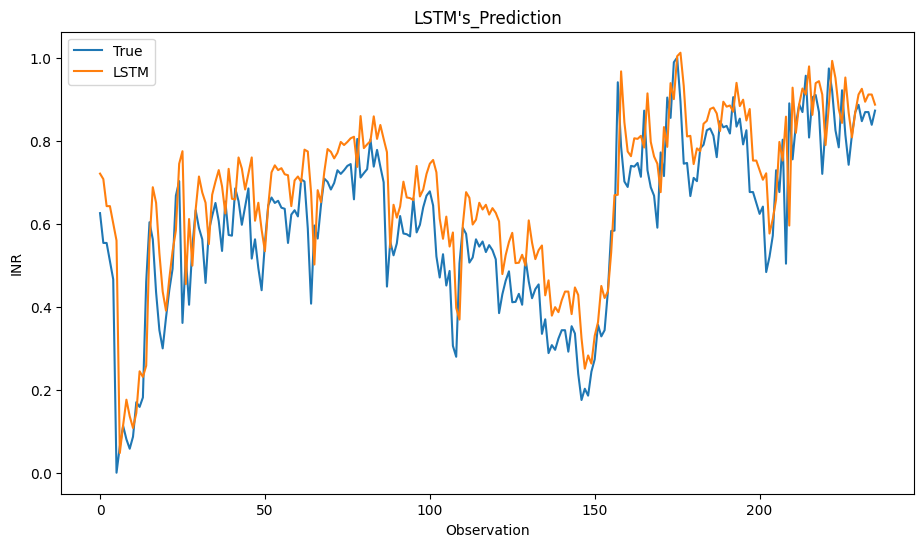

In [ ]:
plt.figure(figsize=(11,6))
plt.plot(y_test, label='True')
plt.plot(y_test_pred_lstm, label='LSTM')
plt.title("LSTM's_Prediction")
plt.xlabel('Observation')
plt.ylabel('INR')
plt.legend()
plt.show()

In [245]:

# Predict for the next 150 days
future_days=150
future_predictions = []
last_sequence = X_test_l[-1].reshape(1, 1, 1)  # Start with the last sequence from the test data

for _ in range(future_days):
    next_pred = model_lstm.predict(last_sequence)
    future_predictions.append(next_pred[0, 0])
    last_sequence = np.concatenate([last_sequence[:, 1:, :], next_pred.reshape(1, 1, 1)], axis=1)
#future_predictions=np.array(future_predictions).reshape(-1, 1)
# Inverse transform the predictions to get the actual prices
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))
# Create a date range for the future predictions
last_date = data.index[-1]
future_dates = pd.date_range(last_date + pd.DateOffset(days=1), periods=future_days, freq='D')

# Create a DataFrame for the future predictions
future_df = pd.DataFrame({'Price': future_predictions.flatten()}, index=future_dates)

future_df.head(30)

1/1 [==============================] - 0s 40ms/step


,Price
2024-07-11,83.520485
2024-07-12,83.564400
2024-07-13,83.598473
2024-07-14,83.624496
2024-07-15,83.644165
2024-07-16,83.658897
2024-07-17,83.669876
2024-07-18,83.678024
2024-07-19,83.684044
2024-07-20,83.688477


# **GRU Model**

In [ ]:
from keras.layers import GRU
K.clear_session()
model_gru = Sequential()
model_gru.add(GRU(7, input_shape=(1, X_train_l.shape[1]), activation='linear', kernel_initializer='lecun_uniform', return_sequences=False))
model_gru.add(Dense(1))
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 7)                 210       
                                                                 
 dense (Dense)               (None, 1)                 8         
                                                                 
Total params: 218 (872.00 Byte)
Trainable params: 218 (872.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_gru.compile(loss=tf.keras.metrics.mean_squared_error,
              metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')], optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=10, verbose=1)
history_model_gru = model_gru.fit(X_train_l, y_train, epochs=100, batch_size=1, verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/100
943/943 [==============================] - 4s 3ms/step - loss: 0.0049 - rmse: 0.0697
Epoch 2/100
943/943 [==============================] - 3s 3ms/step - loss: 0.0024 - rmse: 0.0493
Epoch 3/100
943/943 [==============================] - 3s 3ms/step - loss: 6.1136e-04 - rmse: 0.0247
Epoch 4/100
943/943 [==============================] - 3s 3ms/step - loss: 5.0570e-04 - rmse: 0.0225
Epoch 5/100
943/943 [==============================] - 2s 3ms/step - loss: 5.1738e-04 - rmse: 0.0227
Epoch 6/100
943/943 [==============================] - 2s 3ms/step - loss: 5.3908e-04 - rmse: 0.0232
Epoch 7/100
943/943 [==============================] - 3s 3ms/step - loss: 5.5304e-04 - rmse: 0.0235
Epoch 8/100
943/943 [==============================] - 3s 4ms/step - loss: 5.5618e-04 - rmse: 0.0236
Epoch 9/100
943/943 [==============================] - 3s 3ms/step - loss: 5.5252e-04 - rmse: 0.0235
Epoch 10/100
943/943 [==============================] - 3s 3ms/step - loss: 5.4641e-04 - rmse: 0.02

**Plot for RMSE and Loss**

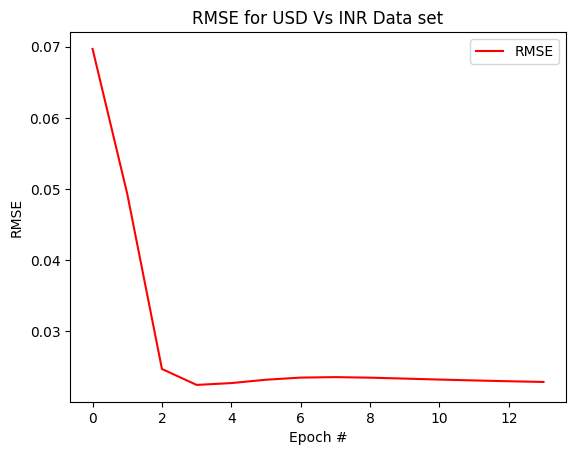

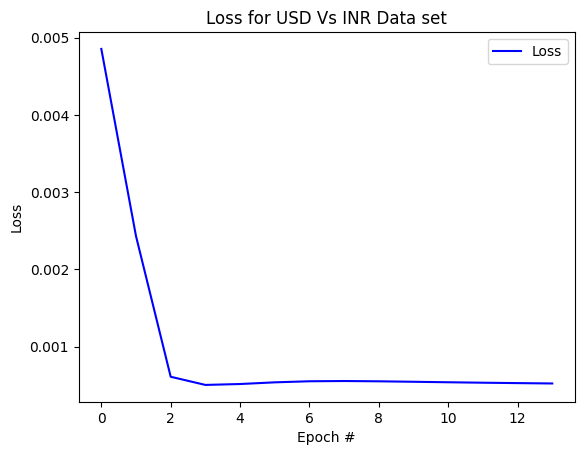

In [ ]:
N = len(history_model_gru.history['loss'])

# Plot RMSE
plt.figure()
plt.plot(np.arange(0, N), history_model_gru.history["rmse"], label="RMSE",color='red')
plt.title("RMSE for USD Vs INR Data set")
plt.xlabel("Epoch #")
plt.ylabel("RMSE")
plt.legend(loc="upper right")

# Plot Loss
plt.figure()
plt.plot(np.arange(0, N), history_model_gru.history["loss"], label="Loss",color='blue')
plt.title("Loss for USD Vs INR Data set")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper right")

plt.show() # Display both plots

In [235]:
y_test_pred_gru = model_gru.predict(X_test_l)
y_train_pred_gru = model_gru.predict(X_train_l)

30/30 [==============================] - 0s 3ms/step


**Performance metrics**

Train data

In [233]:
mse_train_gru = mean_squared_error(y_train, y_train_pred_lstm)
rmse_train_gru = np.sqrt(mse_train_gru)
mae_train_gru = mean_absolute_error(y_train, y_train_pred_gru)
r2_train_gru = r2_score(y_train, y_train_pred_gru)

print("Mean Squared Error (Train)_gru:", mse_train_gru)
print("Root Mean Squared Error (Train)_gru:", rmse_train_gru)
print("Mean Absolute Error (Train)_gru:", mae_train_gru)
print("R2 Score (Train)_gru:", r2_train_gru)

Mean Squared Error (Train)_gru: 0.005958489429639621
Root Mean Squared Error (Train)_gru: 0.0771912522870281
Mean Absolute Error (Train)_gru: 0.06257398207028853
R2 Score (Train)_gru: 0.9429297394628626


Test data

In [236]:
mse_test_gru = mean_squared_error(y_test, y_test_pred_gru)
rmse_test_gru = np.sqrt(mse_test_gru)
mae_test_gru = mean_absolute_error(y_test, y_test_pred_gru)
r2_test_gru = r2_score(y_test, y_test_pred_gru)

print("Mean Squared Error (Test)_gru:", mse_test_gru)
print("Root Mean Squared Error (Test)_gru:", rmse_test_gru)
print("Mean Absolute  Error (Test)_gru:", mae_test_gru)
print("R2 Score (Test)_gru:", r2_test_gru)

Mean Squared Error (Test)_gru: 0.011902196513794257
Root Mean Squared Error (Test)_gru: 0.10909718838629279
Mean Absolute  Error (Test)_gru: 0.08403209426790956
R2 Score (Test)_gru: 0.7074167378391857


# **GRU Plot**

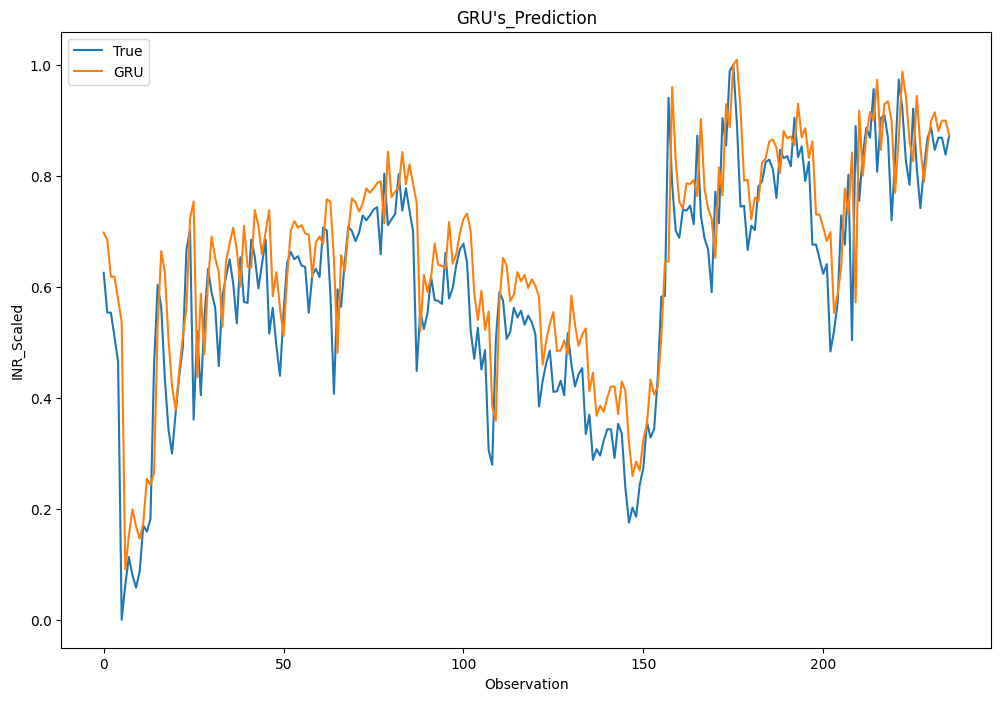

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(y_test, label='True')
plt.plot(y_pred_test_gru, label='GRU')
plt.title("GRU's_Prediction")
plt.xlabel('Observation')
plt.ylabel('INR_Scaled')
plt.legend()
plt.show()

In [244]:

# Predict for the next 150 days(50 weeks)
future_days=150
future_predictions = []
last_sequence = X_test_l[-1].reshape(1, 1, 1)  # Start with the last sequence from the test data

for _ in range(future_days):
    next_pred = model_gru.predict(last_sequence)
    future_predictions.append(next_pred[0, 0])
    last_sequence = np.concatenate([last_sequence[:, 1:, :], next_pred.reshape(1, 1, 1)], axis=1)
#future_predictions=np.array(future_predictions).reshape(-1, 1)
# Inverse transform the predictions to get the actual prices
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))
print(future_predictions)

# Create a date range for the future predictions
last_date = data.index[-1]
future_dates = pd.date_range(last_date + pd.DateOffset(days=1), periods=future_days, freq='D')

# Create a DataFrame for the future predictions
future_df = pd.DataFrame({'Price': future_predictions.flatten()}, index=future_dates)

future_df.head(30)


1/1 [==============================] - 0s 24ms/step
[[83.505135]
 [83.539536]
 [83.56872 ]
 [83.59326 ]
 [83.61375 ]
 [83.63072 ]
 [83.644714]
 [83.6562  ]
 [83.66558 ]
 [83.67322 ]
 [83.67944 ]
 [83.68448 ]
 [83.68855 ]
 [83.69185 ]
 [83.69451 ]
 [83.696655]
 [83.698395]
 [83.69978 ]
 [83.70091 ]
 [83.70181 ]
 [83.70254 ]
 [83.703125]
 [83.70359 ]
 [83.70398 ]
 [83.704285]
 [83.70453 ]
 [83.70472 ]
 [83.70488 ]
 [83.705   ]
 [83.70511 ]
 [83.705185]
 [83.70526 ]
 [83.70531 ]
 [83.70535 ]
 [83.70539 ]
 [83.705414]
 [83.70543 ]
 [83.70545 ]
 [83.70547 ]
 [83.705475]
 [83.70548 ]
 [83.70549 ]
 [83.705505]
 [83.70551 ]
 [83.70551 ]
 [83.70551 ]
 [83.70552 ]
 [83.70552 ]
 [83.70552 ]
 [83.70552 ]
 [83.70552 ]
 [83.70552 ]
 [83.70553 ]
 [83.70553 ]
 [83.70553 ]
 [83.70553 ]
 [83.70553 ]
 [83.70553 ]
 [83.70553 ]
 [83.70553 ]
 [83.70553 ]
 [83.70553 ]
 [83.70553 ]
 [83.70553 ]
 [83.70553 ]
 [83.70553 ]
 [83.70553 ]
 [83.70553 ]
 [83.70553 ]
 [83.70553 ]
 [83.70553 ]
 [83.70553 ]
 [83.70553 ]

,Price
2024-07-11,83.505135
2024-07-12,83.539536
2024-07-13,83.568718
2024-07-14,83.593262
2024-07-15,83.613747
2024-07-16,83.630722
2024-07-17,83.644714
2024-07-18,83.656197
2024-07-19,83.665581
2024-07-20,83.673218
